# What are The most Demanded Skills for Top 3 most Pupolar Data Roles ?
## Methodology
 - clean up skill column
 - calculate skill count based on job_title_short
 - calculate skill percentage 
 - plot final findings


In [113]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast
# Loading dataset
data_set = load_dataset('lukebarousse/data_jobs')
df = data_set['train'].to_pandas()
# Cleaning dataset
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list : ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [ ]:
# exploding and grouping data frame on job skills and job titles
df_exploded = df.explode('job_skills')
df_grouped = df_exploded.groupby(['job_skills','job_title_short']).size().reset_index(name='skill_count').sort_values(by='skill_count',ascending=False)
# defining grand total on a new data series
df_skill_count  = df['job_title_short'].value_counts()
# merge main data to define skill percentage
df_merged = pd.merge(df_grouped,df_skill_count,how='left',on='job_title_short') 
df_merged['skill_percent'] = 100 * df_merged['skill_count'] / df_merged['count']

In [ ]:
df_merged.head(10)

,job_skills,job_title_short,skill_count,count,skill_percent
0,python,Data Scientist,113711,172286,66.001300
1,sql,Data Engineer,113130,186241,60.743875
2,python,Data Engineer,108022,186241,58.001192
3,sql,Data Analyst,92428,196075,47.139105
4,sql,Data Scientist,78982,172286,45.843539
...,...,...,...,...,...
2251,webex,Senior Data Scientist,1,36957,0.002706
2252,mattermost,Data Scientist,1,172286,0.000580
2253,clickup,Machine Learning Engineer,1,14080,0.007102
2254,heroku,Senior Data Analyst,1,29216,0.003423


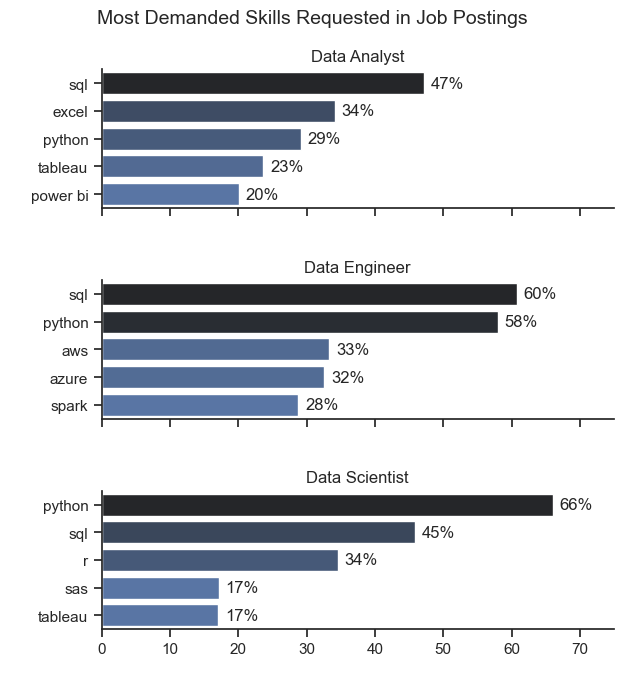

In [ ]:
# explore top 3 data titles , sorting
job_titles = df_merged['job_title_short'].unique().tolist()[:3]
job_titles = sorted(job_titles)
# define subplots to show 3 plots on a board
fig, ax = plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')
# creating plots and manipulate
for i ,job_title in enumerate(job_titles):
    df_plot = df_merged[df_merged['job_title_short'] == job_title ].head(5)
    sns.barplot(data=df_plot,x='skill_percent',y='job_skills',ax=ax[i],hue='skill_percent',palette='dark:b_r',legend=False)
    ax[i].set_title(job_title)
    ax[i].set_xlim(0,75)
    ax[i].set_ylabel(' ')
    ax[i].set_xlabel(' ')
    # removing first two plot xticks label
    if i != len(job_titles) - 1:
        ax[i].set_xticklabels([])
    # defining text of percentages for each skill
    for n,v in enumerate(df_plot['skill_percent']):
        ax[i].text(x=v+1,y=n,s=f"{int(v)}%",va='center')
# Customization
fig.suptitle('Most Demanded Skills Requested in Job Postings',fontsize=14)
fig.set_figheight(7)
fig.tight_layout()
sns.despine()
plt.show()
